In [122]:
import matplotlib.pyplot as plt
from random import random, gauss
from bisect import bisect_right
import numpy as np

N = 50
EPS = 0.1

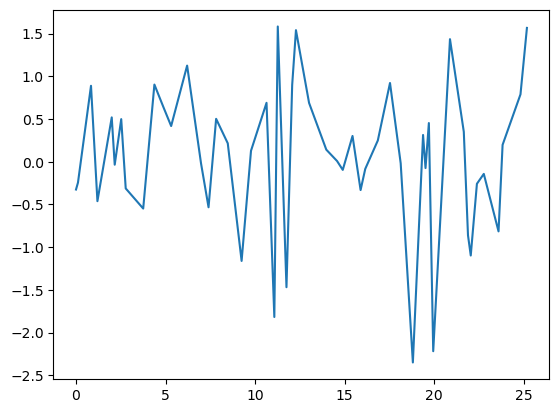

In [123]:
xpnt = [0]
for i in range(1, N):
  shift = random()
  while shift < EPS:
    shift = random()
  xpnt.append(xpnt[-1] + shift)
    
ypnt = [gauss() for i in range(N)]

def target(x):
  if x > xpnt[-1] or x < 0:
    return None
  i = bisect_right(xpnt, x) - 1
  return (ypnt[i + 1] - ypnt[i]) / (xpnt[i + 1] - xpnt[i]) * (x - xpnt[i]) + ypnt[i]
  

def searchspace():
  return np.random.uniform(0, xpnt[-1])


plt.plot(xpnt, ypnt)
plt.show()

In [124]:
# criterion to accept new randomly generated solution
def accept_solution(tempr, delta_ener):
  # if energy decreased
  if delta_ener < 0:
    return True
  
  # energy increased: probability to find system with increased energy decreases when
  # the tempereture decreases 
  prob = random()
  return prob < np.exp(-delta_ener / tempr)
  
  
def simulated_annealing(tempr_max, tempr_min=0, ener_thr=-10, cooling_coef=0.98):
  tempr = tempr_max
  x = searchspace()
  ener = target(x)
  
  while tempr > tempr_min and ener > ener_thr:
    x_new = searchspace()
    ener_new = target(x_new)
    if accept_solution(tempr, ener_new - ener):
      x, ener = x_new, ener_new
    tempr -= 0.1
    
  return x

In [125]:
argmin = np.argmin(ypnt)
xmax = xpnt[argmin]
ymax = ypnt[argmin]
print(xmax, ymax)

18.80568955753761 -2.3487707835988396


In [126]:
simulated_annealing(30)

22.920742149326934